In [1]:
######This is an individual project conducted by Van Truong, a degree student at the University
#of Helsinki, for the course Introduction to NLP for Digital Humanities 2020
#In this project, I aimed to access a Reddit thread about Pokemon starters to see which type
#of Pokemon and which Pokemons attracted most of the users's attention in the thread
#The Reddit thread can be accessed at: 
#https://www.reddit.com/r/gaming/comments/avhv3p/all_pokemon_starters
#I also visualized my results to facilitate the writing of my report for this project

###To get started, I imported the pandas library and PRAW, which is a Python package
#that grants access to Reddit's API (Application Programming Interface)
#PRAW was previously installed on my computer by typing "pip install praw" in the terminal

import pandas as pd
import praw

In [2]:
###Next, I wanted to get reddit and subreddit instances
#To do so, I had to authenticate myself. Thus, I created a reddit account 
#and a reddit application to obtain the client_id, client_secret, and user_agent

In [3]:
reddit = praw.Reddit(client_id='QudPpybQT0xlmQ', 
                     client_secret='SH8QDlrHgiEopPrFai14zUielmI', 
                     user_agent='MyPoGOproject')

In [4]:
subreddit = reddit.subreddit('gaming')

In [5]:
###Then, I wanted to access the thread about Pokemon starters. I used the .search method
#to search for the thread in the subreddit "gaming"
#My first attempt was:
#---> my_thread = subreddit.search("All pokemon starters!")
#But this resulted in a problem: the dictionary contained all submissions matching the key words
#while I only wanted the first thread, which has the most comments.
#So I set a limit to the search function:

my_thread = subreddit.search("All pokemon starters!", limit=1)

In [6]:
###In this step, I chose which kinds of data to obtain and created a dictionary to store the data

pokemon_dict = { "title":[], "score":[], "id":[], "comms_num": [], "date": [], "body":[]}

In [7]:
###I used the for loop to iterate through "my_thread" and append data to the dictionary

for submission in my_thread:
    pokemon_dict["title"].append(submission.title)
    pokemon_dict["score"].append(submission.score)
    pokemon_dict["id"].append(submission.id)
    pokemon_dict["comms_num"].append(submission.num_comments)
    pokemon_dict["date"].append(submission.created)
    pokemon_dict["body"].append(submission.selftext)

In [8]:
###When I printed "my_thread", the data could not be read normally.
#So, I used pandas to create a dataframe which looks like a spreadsheet from the dictionary

df_dict = pd.DataFrame(pokemon_dict)

In [9]:
###Checking my dataframe

print(df_dict)

                   title  score      id  comms_num          date body
0  All pokemon starters!   2532  avhv3p        390  1.551327e+09     


In [10]:
###After the previous step, I encountered a problem. I wanted to access the comments
#but the "body" column is empty
#I did not erased all the codes above as the information may be useful for my following steps

In [11]:
###In this step, I managed to access all the comments in the thread
#First, I obtained a submission object

url = "https://www.reddit.com/r/gaming/comments/avhv3p/all_pokemon_starters"
submission = reddit.submission(url=url)

In [12]:
###Then, using the comments attribute of the submission object, I could interact with
#the thread's comment forest. However, the comment forest may be deep with many comments
#So, I used the list() method which returned the top-level comments, followed by second-level ones, and so on.
#Finally, I used the append() method to append the comments to the previously created list "comments"

comments = []
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    comments.append(comment.body)

In [13]:
###I wanted to check the number of comments appended by using the len() method. 
#It seems that I managed to get all comments as the total number of comments is 390 (shown in df_dict)
#Excluding the first comment in the submission, there should be 389 comments.

len(comments)

389

In [14]:
###In this step, I counted how many times each type of Pokemon starters was mentioned.
#There are three types of Pokemon starters: grass, water, and fire
#but first I need to convert my list "comments" into a string to use the count() method
#To convert my list to a string, I used the join() method.

str_comments = "".join(comments)

In [15]:
###Checking the content of str_comments

print(str_comments)

Everybody be hating my main stay grass typesI'll be 6/8 Gens picking water starter.

Didnt even realize how much I prefer the water types most of the timeTreecko still styling in everyone elseFuck... I only know Pokemon up to the 3rd gen... Remaining Fire-types: Ox, Goat, Horse, and Snake.

I, for one, would love to see a Fire/Poison-type.Gen 2 was my favorite. Except Chikorita, the worthless bastard. But Totodile and Cyndaquil made up for it All the starters? I think pikachu is going to have one heck of a surprised face when he doesn't see himself on this!I still think the first were the best.\*Checks Chinese Zodiac\* Yep, now we got a Rabbit in the fire startersYou know that owl is a grass type just cause he has a green bow tie.Bulbasaur! Charizard! Squirtle! 

Chiquorita! Uhmm... Totodile! 

Hmmm... Torchick! Mudkip! 

Uhhh.... Hmmmm... Yeahhh... 

Riiiiiight.... 

Even if I buy the new gen I doubt I'll remember their names... :PMudkip will always be my spirit-monPiplup is still my 

In [16]:
###Then, I counted how many times the words grass, fire, and water were mentioned by simply
#using the count() method
#Noting that the words may be case-sensitive, I counted Grass, Fire, and Water as well
#I also created a dictionary with specified keys to store all the counts

all_dict = {"grass":[], "fire":[], "water":[], 
            "bulbasaur": [], "charmander": [], "squirtle":[],
            "chikorita":[], "cyndaquil":[], "totodile":[],
            "treecko": [], "torchic": [], "mudkip":[],
            "turtwig":[], "chimchar":[], "piplup":[],
            "snivy": [], "tepig": [], "oshawott":[],
            "chespin":[], "fennekin":[], "froakie":[],
            "rowlet": [], "litten": [], "popplio":[],
            "grookey": [], "scorbunny": [], "sobble":[]}

In [17]:
all_dict["grass"].append(str_comments.count("grass") + str_comments.count("Grass"))

In [18]:
all_dict["fire"].append(str_comments.count("fire") + str_comments.count("Fire"))

In [19]:
all_dict["water"].append(str_comments.count("water") + str_comments.count("Water"))

In [20]:
###I repeated the same steps for each pokemon

In [21]:
all_dict["bulbasaur"].append(str_comments.count("bulbasaur") + str_comments.count("Bulbasaur"))

In [22]:
all_dict["charmander"].append(str_comments.count("charmander") + str_comments.count("Charmander"))

In [23]:
all_dict["squirtle"].append(str_comments.count("squirtle") + str_comments.count("Squirtle"))

In [24]:
all_dict["chikorita"].append(str_comments.count("chikorita") + str_comments.count("Chikorita"))

In [25]:
all_dict["cyndaquil"].append(str_comments.count("cyndaquil") + str_comments.count("Cyndaquil"))

In [26]:
all_dict["totodile"].append(str_comments.count("totodile") + str_comments.count("Totodile"))

In [27]:
all_dict["treecko"].append(str_comments.count("treecko") + str_comments.count("Treecko"))

In [28]:
all_dict["torchic"].append(str_comments.count("torchic") + str_comments.count("Torchic"))

In [29]:
all_dict["mudkip"].append(str_comments.count("mudkip") + str_comments.count("Mudkip"))

In [30]:
all_dict["turtwig"].append(str_comments.count("turtwig") + str_comments.count("Turtwig"))

In [31]:
all_dict["chimchar"].append(str_comments.count("chimchar") + str_comments.count("Chimchar"))

In [32]:
all_dict["piplup"].append(str_comments.count("piplup") + str_comments.count("Piplup"))

In [33]:
all_dict["snivy"].append(str_comments.count("snivy") + str_comments.count("Snivy"))

In [34]:
all_dict["tepig"].append(str_comments.count("tepig") + str_comments.count("Tepig"))

In [35]:
all_dict["oshawott"].append(str_comments.count("oshawott") + str_comments.count("Oshawott"))

In [36]:
all_dict["chespin"].append(str_comments.count("chespin") + str_comments.count("Chespin"))

In [37]:
all_dict["fennekin"].append(str_comments.count("fennekin") + str_comments.count("Fennekin"))

In [38]:
all_dict["froakie"].append(str_comments.count("froakie") + str_comments.count("Froakie"))

In [39]:
all_dict["rowlet"].append(str_comments.count("rowlet") + str_comments.count("Rowlet"))

In [40]:
all_dict["litten"].append(str_comments.count("litten") + str_comments.count("Litten"))

In [41]:
all_dict["popplio"].append(str_comments.count("popplio") + str_comments.count("Popplio"))

In [42]:
all_dict["grookey"].append(str_comments.count("grookey") + str_comments.count("Grookey"))

In [43]:
all_dict["scorbunny"].append(str_comments.count("scorbunny") + str_comments.count("Scorbunny"))

In [44]:
all_dict["sobble"].append(str_comments.count("sobble") + str_comments.count("Sobble"))

In [45]:
###Checking if I had successfully appended the values to my dictionary keys
print(all_dict)

{'grass': [68], 'fire': [68], 'water': [60], 'bulbasaur': [22], 'charmander': [15], 'squirtle': [16], 'chikorita': [5], 'cyndaquil': [7], 'totodile': [10], 'treecko': [6], 'torchic': [5], 'mudkip': [13], 'turtwig': [6], 'chimchar': [8], 'piplup': [6], 'snivy': [4], 'tepig': [2], 'oshawott': [1], 'chespin': [6], 'fennekin': [4], 'froakie': [4], 'rowlet': [5], 'litten': [4], 'popplio': [1], 'grookey': [2], 'scorbunny': [4], 'sobble': [7]}


In [46]:
###I wanted to visualize the results so I turned this dictionary into a dataframe
df_all = pd.DataFrame(all_dict)

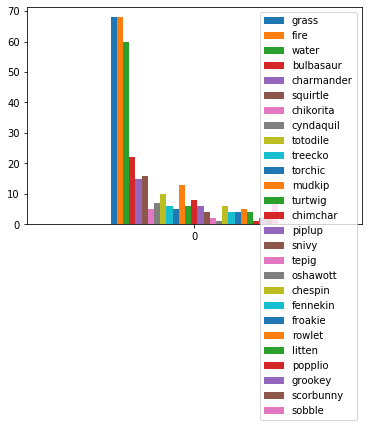

In [47]:
###I could visualize my dataframes using the .plot.bar method in pandas

vi_df_all = df_all.plot.bar(rot=0)

In [48]:
###While those numerical results may tell us about which type of pokemon or which pokemon
#received the most attention from these reddit users, the number of times a specific pokemon
#or a type of pokemon was mentioned tells us very little about the common opinion of all who 
#participated in the thread. 
#Thus, I decided to closely look at the top-level comments only, which allows for close reading
#Close reading is necessary because there is a possibility that some participants did not write
#any comments but voted for the comments with which they agreed instead.
#It is unsound to rely completely on numerical results as we could see in the
#example taken from the third top comment: Gen 2 was my favorite. Except Chikorita, the worthless bastard.
#Here, Chikorita is mentioned, but not in a positive way.

for top_level_comment in submission.comments:
    print(top_level_comment.body)

Everybody be hating my main stay grass types
I'll be 6/8 Gens picking water starter.

Didnt even realize how much I prefer the water types most of the time
Treecko still styling in everyone else
Fuck... I only know Pokemon up to the 3rd gen... 
Remaining Fire-types: Ox, Goat, Horse, and Snake.

I, for one, would love to see a Fire/Poison-type.
Gen 2 was my favorite. Except Chikorita, the worthless bastard. But Totodile and Cyndaquil made up for it 
All the starters? I think pikachu is going to have one heck of a surprised face when he doesn't see himself on this!
I still think the first were the best.
\*Checks Chinese Zodiac\* Yep, now we got a Rabbit in the fire starters
You know that owl is a grass type just cause he has a green bow tie.
Bulbasaur! Charizard! Squirtle! 

Chiquorita! Uhmm... Totodile! 

Hmmm... Torchick! Mudkip! 

Uhhh.... Hmmmm... Yeahhh... 

Riiiiiight.... 

Even if I buy the new gen I doubt I'll remember their names... :P
Mudkip will always be my spirit-mon
Piplup 

In [49]:
###At this point, I finally managed to reach my objectives and my project could be considered
#completed. However, I realized that counting each word like that was not very efficient.
#I wanted to find another way to count the words.

#After some research, I discovered a Python class called Counter 
#which allows me to quickly count every item in str_comments
#As Counter is a part of the collections module, I had to import it from collections.
#The problem was that Counter counted every character in the string when I did this:
#--->from collections import Counter
#--->Counter(str_comments)
#So I split my string to make sure that Counter would count every word

from collections import Counter
my_dict = Counter(str_comments.split(" "))

In [50]:
###After the previous step, the type of "my_dict" became collections.Counter
#I wanted to turn "my_dict" into a dictionary and checked if my code worked

my_dict = dict((my_dict))

In [51]:
print(my_dict)

{'Everybody': 1, 'be': 37, 'hating': 2, 'my': 63, 'main': 4, 'stay': 1, 'grass': 24, "typesI'll": 1, '6/8': 1, 'Gens': 3, 'picking': 2, 'water': 32, 'starter.\n\nDidnt': 1, 'even': 17, 'realize': 4, 'how': 17, 'much': 8, 'I': 165, 'prefer': 1, 'the': 356, 'types': 10, 'most': 11, 'of': 122, 'timeTreecko': 1, 'still': 17, 'styling': 2, 'in': 68, 'everyone': 1, 'elseFuck...': 1, 'only': 33, 'know': 16, 'Pokemon': 19, 'up': 17, 'to': 113, '3rd': 1, 'gen...': 1, 'Remaining': 1, 'Fire-types:': 1, 'Ox,': 1, 'Goat,': 1, 'Horse,': 1, 'and': 219, 'Snake.\n\nI,': 1, 'for': 51, 'one,': 1, 'would': 13, 'love': 17, 'see': 19, 'a': 142, 'Fire/Poison-type.Gen': 1, '2': 18, 'was': 81, 'favorite.': 2, 'Except': 2, 'Chikorita,': 1, 'worthless': 1, 'bastard.': 1, 'But': 12, 'Totodile': 3, 'Cyndaquil': 3, 'made': 8, 'it': 59, 'All': 3, 'starters?': 1, 'think': 29, 'pikachu': 2, 'is': 101, 'going': 1, 'have': 40, 'one': 23, 'heck': 1, 'surprised': 1, 'face': 3, 'when': 16, 'he': 8, "doesn't": 3, 'himself':

In [52]:
###I wanted to filter the dictionary "my_dict" to get only the keys and values that I wanted.
#I would create several dictionaries to make it easier to look at the results
#After taking a look at the content of "my_dict", I noticed a problem with this method: 
#it did not include keys which have special characters after the keys 
#For example, "grass," and "grass." were not included.
#I decided to solve this problem by adding more conditions.

filtered_dict_type = {}
for key, value in my_dict.items():
    if (key == "grass"):
        filtered_dict_type[key] = value
    elif (key == "grass,"):
        filtered_dict_type[key] = value
    elif (key == "grass."):
        filtered_dict_type[key] = value
    elif (key == "Grass"):
        filtered_dict_type[key] = value
    elif (key == "Grass,"):
        filtered_dict_type[key] = value
    elif (key == "Grass."):
        filtered_dict_type[key] = value
    elif (key == "fire"):
        filtered_dict_type[key] = value
    elif (key == "fire,"):
        filtered_dict_type[key] = value
    elif (key == "fire."):
        filtered_dict_type[key] = value
    elif (key == "Fire"):
        filtered_dict_type[key] = value
    elif (key == "Fire,"):
        filtered_dict_type[key] = value
    elif (key == "Fire."):
        filtered_dict_type[key] = value
    elif (key == "water"):
        filtered_dict_type[key] = value
    elif (key == "water,"):
        filtered_dict_type[key] = value
    elif (key == "water."):
        filtered_dict_type[key] = value
    elif (key == "Water"):
        filtered_dict_type[key] = value
    elif (key == "Water,"):
        filtered_dict_type[key] = value
    elif (key == "Water."):
        filtered_dict_type[key] = value
    
print(filtered_dict_type)

{'grass': 24, 'water': 32, 'fire': 36, 'Fire': 3, 'Water': 5, 'Water,': 1, 'water,': 4, 'grass,': 4, 'Grass': 8, 'Grass,': 2, 'Fire,': 2, 'fire,': 2, 'water.': 2, 'Fire.': 1, 'Grass.': 1}


In [53]:
###From this point onwards, I would create a dictionary for each generation of pokemon starters
#Generation 1:

filtered_dict_gen1 = {}
for key, value in my_dict.items():
    if (key == "bulbasaur"):
        filtered_dict_gen1[key] = value
    elif (key == "bulbasaur,"):
        filtered_dict_gen1[key] = value
    elif (key == "bulbasaur."):
        filtered_dict_gen1[key] = value
    elif (key == "Bulbasaur"):
        filtered_dict_gen1[key] = value
    elif (key == "Bulbasaur,"):
        filtered_dict_gen1[key] = value
    elif (key == "Bulbasaur."):
        filtered_dict_gen1[key] = value
    elif (key == "charmander"):
        filtered_dict_gen1[key] = value
    elif (key == "charmander,"):
        filtered_dict_gen1[key] = value
    elif (key == "charmander."):
        filtered_dict_gen1[key] = value
    elif (key == "Charmander"):
        filtered_dict_gen1[key] = value
    elif (key == "Charmander,"):
        filtered_dict_gen1[key] = value
    elif (key == "Charmander."):
        filtered_dict_gen1[key] = value
    elif (key == "squirtle"):
        filtered_dict_gen1[key] = value
    elif (key == "squirtle,"):
        filtered_dict_gen1[key] = value
    elif (key == "squirtle."):
        filtered_dict_gen1[key] = value
    elif (key == "Squirtle"):
        filtered_dict_gen1[key] = value
    elif (key == "Squirtle,"):
        filtered_dict_gen1[key] = value
    elif (key == "Squirtle."):
        filtered_dict_gen1[key] = value

print(filtered_dict_gen1)

{'Bulbasaur,': 2, 'Bulbasaur': 13, 'Charmander': 7, 'Squirtle': 5, 'Charmander,': 2, 'Squirtle,': 1, 'charmander': 1, 'bulbasaur': 2, 'squirtle': 4, 'squirtle.': 1}


In [54]:
#Generation 2:

filtered_dict_gen2 = {}
for key, value in my_dict.items():
    if (key == "chikorita"):
        filtered_dict_gen2[key] = value
    elif (key == "chikorita,"):
        filtered_dict_gen2[key] = value
    elif (key == "chikorita."):
        filtered_dict_gen2[key] = value
    elif (key == "Chikorita"):
        filtered_dict_gen2[key] = value
    elif (key == "Chikorita,"):
        filtered_dict_gen2[key] = value
    elif (key == "Chikorita."):
        filtered_dict_gen2[key] = value
    elif (key == "cyndaquil"):
        filtered_dict_gen2[key] = value
    elif (key == "cyndaquil,"):
        filtered_dict_gen2[key] = value
    elif (key == "cyndaquil."):
        filtered_dict_gen2[key] = value
    elif (key == "Cyndaquil"):
        filtered_dict_gen2[key] = value
    elif (key == "Cyndaquil,"):
        filtered_dict_gen2[key] = value
    elif (key == "Cyndaquil."):
        filtered_dict_gen2[key] = value
    elif (key == "totodile"):
        filtered_dict_gen2[key] = value
    elif (key == "totodile,"):
        filtered_dict_gen2[key] = value
    elif (key == "totodile."):
        filtered_dict_gen2[key] = value
    elif (key == "Totodile"):
        filtered_dict_gen2[key] = value
    elif (key == "Totodile,"):
        filtered_dict_gen2[key] = value
    elif (key == "Totodile."):
        filtered_dict_gen2[key] = value
print(filtered_dict_gen2)

{'Chikorita,': 1, 'Totodile': 3, 'Cyndaquil': 3, 'Totodile,': 2, 'Chikorita': 1, 'cyndaquil': 1, 'chikorita': 1}


In [55]:
#Generation 3:

filtered_dict_gen3 = {}
for key, value in my_dict.items():
    if (key == "treecko"):
        filtered_dict_gen3[key] = value
    elif (key == "treecko,"):
        filtered_dict_gen3[key] = value
    elif (key == "treecko."):
        filtered_dict_gen3[key] = value
    elif (key == "Treecko"):
        filtered_dict_gen3[key] = value
    elif (key == "Treecko,"):
        filtered_dict_gen3[key] = value
    elif (key == "Treecko."):
        filtered_dict_gen3[key] = value
    elif (key == "torchic"):
        filtered_dict_gen3[key] = value
    elif (key == "torchic,"):
        filtered_dict_gen3[key] = value
    elif (key == "torchic."):
        filtered_dict_gen3[key] = value
    elif (key == "Torchic"):
        filtered_dict_gen3[key] = value
    elif (key == "Torchic,"):
        filtered_dict_gen3[key] = value
    elif (key == "Torchic."):
        filtered_dict_gen3[key] = value
    elif (key == "mudkip"):
        filtered_dict_gen3[key] = value
    elif (key == "mudkip,"):
        filtered_dict_gen3[key] = value
    elif (key == "mudkip."):
        filtered_dict_gen3[key] = value
    elif (key == "Mudkip"):
        filtered_dict_gen3[key] = value
    elif (key == "Mudkip,"):
        filtered_dict_gen3[key] = value
    elif (key == "Mudkip."):
        filtered_dict_gen3[key] = value

print(filtered_dict_gen3)

{'Mudkip,': 1, 'mudkip.': 1, 'mudkip': 2, 'torchic': 1, 'Treecko': 3, 'Treecko,': 1, 'Mudkip': 1, 'treecko': 1, 'Torchic': 1, 'mudkip,': 1}


In [56]:
#Generation 4:

filtered_dict_gen4 = {}
for key, value in my_dict.items():
    if (key == "turtwig"):
        filtered_dict_gen4[key] = value
    elif (key == "turtwig,"):
        filtered_dict_gen4[key] = value
    elif (key == "turtwig."):
        filtered_dict_gen4[key] = value
    elif (key == "Turtqig"):
        filtered_dict_gen4[key] = value
    elif (key == "Turtwig,"):
        filtered_dict_gen4[key] = value
    elif (key == "Turtwig."):
        filtered_dict_gen4[key] = value
    elif (key == "chimchar"):
        filtered_dict_gen4[key] = value
    elif (key == "chimchar,"):
        filtered_dict_gen4[key] = value
    elif (key == "chimchar."):
        filtered_dict_gen4[key] = value
    elif (key == "Chimchar"):
        filtered_dict_gen4[key] = value
    elif (key == "Chimchar,"):
        filtered_dict_gen4[key] = value
    elif (key == "Chimchar."):
        filtered_dict_gen4[key] = value
    elif (key == "piplup"):
        filtered_dict_gen4[key] = value
    elif (key == "piplup,"):
        filtered_dict_gen4[key] = value
    elif (key == "piplup."):
        filtered_dict_gen4[key] = value
    elif (key == "Piplup"):
        filtered_dict_gen4[key] = value
    elif (key == "Piplup,"):
        filtered_dict_gen4[key] = value
    elif (key == "Piplup."):
        filtered_dict_gen4[key] = value

print(filtered_dict_gen4)

{'Chimchar,': 1, 'turtwig,': 1, 'Chimchar': 3, 'chimchar,': 2, 'piplup,': 1, 'Piplup': 2, 'turtwig': 1, 'chimchar': 1}


In [57]:
#Generation 5:

filtered_dict_gen5 = {}
for key, value in my_dict.items():
    if (key == "snivy"):
        filtered_dict_gen5[key] = value
    elif (key == "snivy,"):
        filtered_dict_gen5[key] = value
    elif (key == "snivy."):
        filtered_dict_gen5[key] = value
    elif (key == "Snivy"):
        filtered_dict_gen5[key] = value
    elif (key == "Snivy,"):
        filtered_dict_gen5[key] = value
    elif (key == "Snivy."):
        filtered_dict_gen5[key] = value
    elif (key == "tepig"):
        filtered_dict_gen5[key] = value
    elif (key == "tepig,"):
        filtered_dict_gen5[key] = value
    elif (key == "tepig."):
        filtered_dict_gen5[key] = value
    elif (key == "Tepig"):
        filtered_dict_gen5[key] = value
    elif (key == "Tepig,"):
        filtered_dict_gen5[key] = value
    elif (key == "Tepig."):
        filtered_dict_gen5[key] = value
    elif (key == "oshawott"):
        filtered_dict_gen5[key] = value
    elif (key == "oshawott,"):
        filtered_dict_gen5[key] = value
    elif (key == "oshawott."):
        filtered_dict_gen5[key] = value
    elif (key == "Oshawott"):
        filtered_dict_gen5[key] = value
    elif (key == "Oshawott,"):
        filtered_dict_gen5[key] = value
    elif (key == "Oshawott."):
        filtered_dict_gen5[key] = value

print(filtered_dict_gen5)

{'Snivy,': 2, 'Snivy': 1, 'tepig': 1, 'Oshawott.': 1}


In [58]:
#Generation 6:

filtered_dict_gen6 = {}
for key, value in my_dict.items():
    if (key == "chespin"):
        filtered_dict_gen6[key] = value
    elif (key == "chespin,"):
        filtered_dict_gen6[key] = value
    elif (key == "chespin."):
        filtered_dict_gen6[key] = value
    elif (key == "Chespin"):
        filtered_dict_gen6[key] = value
    elif (key == "Chespin,"):
        filtered_dict_gen6[key] = value
    elif (key == "Chespin."):
        filtered_dict_gen6[key] = value
    elif (key == "fennekin"):
        filtered_dict_gen6[key] = value
    elif (key == "fennekin,"):
        filtered_dict_gen6[key] = value
    elif (key == "fennekin."):
        filtered_dict_gen6[key] = value
    elif (key == "Fennekin"):
        filtered_dict_gen6[key] = value
    elif (key == "Fennekin,"):
        filtered_dict_gen6[key] = value
    elif (key == "Fennekin."):
        filtered_dict_gen6[key] = value
    elif (key == "froakie"):
        filtered_dict_gen6[key] = value
    elif (key == "froakie,"):
        filtered_dict_gen6[key] = value
    elif (key == "froakie."):
        filtered_dict_gen6[key] = value
    elif (key == "Froakie"):
        filtered_dict_gen6[key] = value
    elif (key == "Froakie,"):
        filtered_dict_gen6[key] = value
    elif (key == "Froakie."):
        filtered_dict_gen6[key] = value

print(filtered_dict_gen6)

{'Chespin': 2, 'Froakie,': 1, 'chespin': 3, 'fennekin': 1, 'Fennekin': 2, 'Fennekin.': 1, 'froakie': 1, 'Froakie': 1}


In [59]:
#Generation 7:

filtered_dict_gen7 = {}
for key, value in my_dict.items():
    if (key == "rowlet"):
        filtered_dict_gen7[key] = value
    elif (key == "rowlet,"):
        filtered_dict_gen7[key] = value
    elif (key == "rowlet."):
        filtered_dict_gen7[key] = value
    elif (key == "Rowlet"):
        filtered_dict_gen7[key] = value
    elif (key == "Rowlet,"):
        filtered_dict_gen7[key] = value
    elif (key == "Rowlet."):
        filtered_dict_gen7[key] = value
    elif (key == "litten"):
        filtered_dict_gen7[key] = value
    elif (key == "litten,"):
        filtered_dict_gen7[key] = value
    elif (key == "litten."):
        filtered_dict_gen7[key] = value
    elif (key == "Litten"):
        filtered_dict_gen7[key] = value
    elif (key == "Litten,"):
        filtered_dict_gen7[key] = value
    elif (key == "Litten."):
        filtered_dict_gen7[key] = value
    elif (key == "popplio"):
        filtered_dict_gen7[key] = value
    elif (key == "popplio,"):
        filtered_dict_gen7[key] = value
    elif (key == "popplio."):
        filtered_dict_gen7[key] = value
    elif (key == "Popplio"):
        filtered_dict_gen7[key] = value
    elif (key == "Popplio,"):
        filtered_dict_gen7[key] = value
    elif (key == "Popplio."):
        filtered_dict_gen7[key] = value

print(filtered_dict_gen7)

{'Rowlet,': 1, 'Popplio': 1, 'litten': 1}


In [60]:
#Generation 8:

filtered_dict_gen8 = {}
for key, value in my_dict.items():
    if (key == "grookey"):
        filtered_dict_gen8[key] = value
    elif (key == "grookey,"):
        filtered_dict_gen8[key] = value
    elif (key == "grookey."):
        filtered_dict_gen8[key] = value
    elif (key == "Grookey"):
        filtered_dict_gen8[key] = value
    elif (key == "Grookey,"):
        filtered_dict_gen8[key] = value
    elif (key == "Grookey."):
        filtered_dict_gen8[key] = value
    elif (key == "scorbunny"):
        filtered_dict_gen8[key] = value
    elif (key == "scorbunny,"):
        filtered_dict_gen8[key] = value
    elif (key == "scorbunny."):
        filtered_dict_gen8[key] = value
    elif (key == "Scorbunny"):
        filtered_dict_gen8[key] = value
    elif (key == "Scorbunny,"):
        filtered_dict_gen8[key] = value
    elif (key == "Scorbunny."):
        filtered_dict_gen8[key] = value
    elif (key == "sobble"):
        filtered_dict_gen8[key] = value
    elif (key == "sobble,"):
        filtered_dict_gen8[key] = value
    elif (key == "sobble."):
        filtered_dict_gen8[key] = value
    elif (key == "Sobble"):
        filtered_dict_gen8[key] = value
    elif (key == "Sobble,"):
        filtered_dict_gen8[key] = value
    elif (key == "Sobble."):
        filtered_dict_gen8[key] = value
        
print(filtered_dict_gen8)

{'Scorbunny': 3, 'Sobble': 3, 'sobble': 1, 'Grookey': 2}


In [61]:
###In this step, I wanted to take a look at all the dictionaries I had created

print(filtered_dict_type)
print(filtered_dict_gen1)
print(filtered_dict_gen2)
print(filtered_dict_gen3)
print(filtered_dict_gen4)
print(filtered_dict_gen5)
print(filtered_dict_gen6)
print(filtered_dict_gen7)
print(filtered_dict_gen8)

{'grass': 24, 'water': 32, 'fire': 36, 'Fire': 3, 'Water': 5, 'Water,': 1, 'water,': 4, 'grass,': 4, 'Grass': 8, 'Grass,': 2, 'Fire,': 2, 'fire,': 2, 'water.': 2, 'Fire.': 1, 'Grass.': 1}
{'Bulbasaur,': 2, 'Bulbasaur': 13, 'Charmander': 7, 'Squirtle': 5, 'Charmander,': 2, 'Squirtle,': 1, 'charmander': 1, 'bulbasaur': 2, 'squirtle': 4, 'squirtle.': 1}
{'Chikorita,': 1, 'Totodile': 3, 'Cyndaquil': 3, 'Totodile,': 2, 'Chikorita': 1, 'cyndaquil': 1, 'chikorita': 1}
{'Mudkip,': 1, 'mudkip.': 1, 'mudkip': 2, 'torchic': 1, 'Treecko': 3, 'Treecko,': 1, 'Mudkip': 1, 'treecko': 1, 'Torchic': 1, 'mudkip,': 1}
{'Chimchar,': 1, 'turtwig,': 1, 'Chimchar': 3, 'chimchar,': 2, 'piplup,': 1, 'Piplup': 2, 'turtwig': 1, 'chimchar': 1}
{'Snivy,': 2, 'Snivy': 1, 'tepig': 1, 'Oshawott.': 1}
{'Chespin': 2, 'Froakie,': 1, 'chespin': 3, 'fennekin': 1, 'Fennekin': 2, 'Fennekin.': 1, 'froakie': 1, 'Froakie': 1}
{'Rowlet,': 1, 'Popplio': 1, 'litten': 1}
{'Scorbunny': 3, 'Sobble': 3, 'sobble': 1, 'Grookey': 2}


In [62]:
###Finally, I wanted to visualize my dictionaries
#I figured that I needed to turn them into dataframes
#At first, my code was: df_type = pd.DataFrame(filtered_dict_type,index=[0])
#This resulted in a dataframe in which the keys were columns (by default)
#The "index=[0] is needed because the dictionaries contain scalar values
#To make the dataframes look more presentable, I wanted the keys to be rows instead.
#So I changed the orientation of the dataframe

df_type = pd.DataFrame.from_dict(filtered_dict_type, orient='index', columns = ["Counts"])

In [63]:
###Checking if my code works so that I could repeat this step

print(df_type)

        Counts
grass       24
water       32
fire        36
Fire         3
Water        5
Water,       1
water,       4
grass,       4
Grass        8
Grass,       2
Fire,        2
fire,        2
water.       2
Fire.        1
Grass.       1


In [64]:
df_gen1 = pd.DataFrame.from_dict(filtered_dict_gen1, orient='index', columns = ["Counts"])
df_gen2 = pd.DataFrame.from_dict(filtered_dict_gen1, orient='index', columns = ["Counts"])
df_gen3 = pd.DataFrame.from_dict(filtered_dict_gen1, orient='index', columns = ["Counts"])
df_gen4 = pd.DataFrame.from_dict(filtered_dict_gen1, orient='index', columns = ["Counts"])
df_gen5 = pd.DataFrame.from_dict(filtered_dict_gen1, orient='index', columns = ["Counts"])
df_gen6 = pd.DataFrame.from_dict(filtered_dict_gen1, orient='index', columns = ["Counts"])
df_gen7 = pd.DataFrame.from_dict(filtered_dict_gen1, orient='index', columns = ["Counts"])
df_gen8 = pd.DataFrame.from_dict(filtered_dict_gen1, orient='index', columns = ["Counts"])

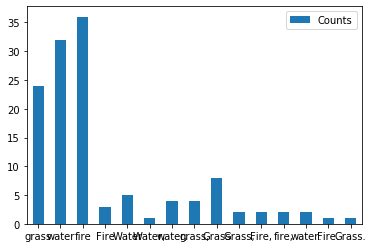

In [65]:
###I visualized my dataframes using the .plot.bar method in pandas

vi_df_type = df_type.plot.bar(rot=0)

In [66]:
###The same step could be applied to the other dataframes

#vi_df_gen1 = df_type.plot.bar(rot=0)
#vi_df_gen2 = df_type.plot.bar(rot=0)
#vi_df_gen3 = df_type.plot.bar(rot=0)
#vi_df_gen4 = df_type.plot.bar(rot=0)
#vi_df_gen5 = df_type.plot.bar(rot=0)
#vi_df_gen6 = df_type.plot.bar(rot=0)
#vi_df_gen7 = df_type.plot.bar(rot=0)
#vi_df_gen8 = df_type.plot.bar(rot=0)

In [67]:
###In the end, I realized that this second attempt was even more time-consuming and required
#a lot more codes. Moreover, the counts of words in the second attempt were lower than those in
#the first. Take "grass" as an example, there is a huge difference, with 39 compared to 68.
#This means, in my second attempt, I did not managed to count all the wanted words.
#Although it took me a lot of time, I was able to learn about Counter, how to adjust 
#the orientation of the dataframe as I turned a dictionary into a dataframe.
#I really learned how to learned from practical experience.